# Logistic regression using Newton's method

Sources:
- <https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17>
- <https://aihubprojects.com/logistic-regression-from-scratch/>

In [215]:
import matplotlib.pyplot as plot
import numpy as np
from utility import display, load_dataset, sigmoid, split_dataset

In [216]:
class LogisticRegression:
    def __init__(self, verbose = False):
        self.verbose = False

    @staticmethod
    def loss( yp, y):
        # loss function to minimize the error of the model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()

    def fit(self, x, y, lr=0.05, epochs=10000):
        loss = []
        # weights initialization
        weights = np.zeros(x.shape[1])
        losses = []
        n = len(x)

        for i in range(epochs):
            # calculate W * Xi
            z = np.dot(x, weights)

            # predict values
            yp = sigmoid(z)

            # calculate the gradient
            gradient = np.dot(x.T, (yp - y)) / y.size

            # update weights
            weights -= lr * gradient

            # calculate new W * Xi
            z = np.dot(x, weights)
            yp = sigmoid(z)

            # calculate the loss
            loss = self.loss(yp, y)

            # display loss
            if self.verbose and i % 1000 == 0:
                print(f'loss in iteration {i} -> {loss} \t')

            # collect loss values
            losses.append(loss)
        # save the weights
        self.weights = weights
        # return loss values
        return losses

    def predict(self, x):
        # Predicting with sigmoid function
        z = np.dot(x, self.weights)
        # Returning binary result
        return sigmoid(z).round()

## Method to display summary statistics

In [217]:
def display_statistics(x_values, y_values):
    print("Mean(x)=%s Mean(Y)=%s" % (np.mean(x_values), np.mean(y_values)))
    print("Median(x)=%s Median(Y)=%s" % (np.median(x_values), np.median(y_values)))
    print("StdDev(x)=%s StdDev(Y)=%s" % (np.std(x_values), np.std(y_values)))
    print("Var(x)=%s Var(Y)=%s" % (np.var(x_values), np.var(y_values)))
    print("Cov(x,y)=%s" % np.cov(x_values, y_values))
    print("Cor(x,y)=%s" % np.correlate(x_values, y_values))

def plot_data(x_values, y_values):
    # plot measurement values
    plot.plot(x_values, y_values, "bo", label="Measured displacements")
    plot.title("Measurement Displacement of Spring", fontsize="x-large")
    plot.xlabel("X Values")
    plot.ylabel("Y Values")
    display_statistics(x_values, y_values)

## Plot data (x and y values) together with regression lines

Training set size: 1004, Testing set size: 366
Accuracy: 0.953551912568306
Precision: 0.9572765233529229
Recall: 0.953551912568306
F1 score: 0.9533071624874904
ROC AUC Score: 0.9502923976608186


/home/kalayci/.cache/pypoetry/virtualenvs/pyml-YtA8qfix-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/kalayci/.cache/pypoetry/virtualenvs/pyml-YtA8qfix-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


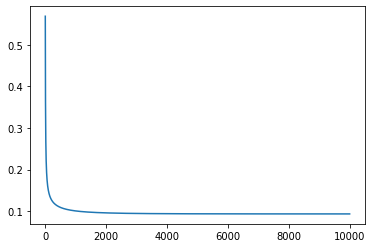

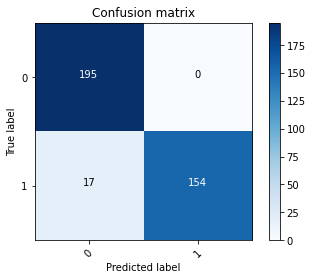

[0.9533071624874904, 0.9502923976608186]

In [218]:
dataset, target = load_dataset("data/banknote.csv")
train_x, train_y, test_x, test_y = split_dataset(dataset, target, 0.75)
print(f"Training set size: {len(train_x)}, Testing set size: {len(test_x)}")
model = LogisticRegression()
# train the model
losses = model.fit(train_x, train_y)
# display loss line
plot.plot(losses)
# predict for test
predictions = model.predict(test_x)
# display test result
display(test_y, predictions)

Accuracy: 0.9863387978142076
Precision: 0.9867269001490313
Recall: 0.9863387978142076
F1 score: 0.9863485123559766
ROC AUC Score: 0.9871794871794871


/home/kalayci/.cache/pypoetry/virtualenvs/pyml-YtA8qfix-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/kalayci/.cache/pypoetry/virtualenvs/pyml-YtA8qfix-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


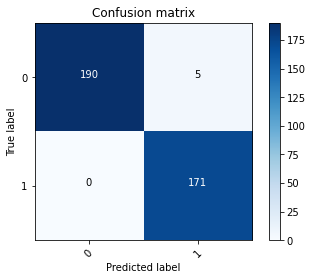

[0.9863485123559766, 0.9871794871794871]

In [219]:
from sklearn.linear_model import LogisticRegression as SKLR
model = SKLR(max_iter=10000)
model.fit(train_x, train_y)
predictions = model.predict(test_x)
display(test_y, predictions)